## Analysis of Remittances_Client_TAT_Data_2022-04-21_hub_tz

Below is a sample analysis of a hub_tz dataset, 
trying to answer a few analysis questions, to give an idea of the real analysis process

#### import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### import dataset

In [39]:
df = pd.read_csv("Remittances_Client_TAT_Data_2022-04-21_hub_tz.csv")
df.head()

,Service Name,Client Name,Beep Transaction ID,Customer Mobile Number,Amount Paid,Date Created,Status Synced,Manually Reconciled,Final Status,MNO TAT,Status Sync TAT,Total TAT
0,Bolt Collections,TIGO TZ,25916854,891904920,17247,2022-04-21 00:03:47,NO,NO,SUCCESS,1.0,NaN,2.0
1,Bolt Collections,TIGO TZ,25916856,672727054,20697,2022-04-21 00:14:07,NO,NO,SUCCESS,1.0,NaN,2.0
2,Bolt Collections,Airtel Tanzania,25916874,1145971514,9630,2022-04-21 00:41:05,NO,NO,SUCCESS,1.0,NaN,2.0
3,Bolt Collections,TIGO TZ,25916885,104045416,20343,2022-04-21 01:07:07,NO,NO,SUCCESS,1.0,NaN,2.0
4,HalotelAirtime,TRANSFER TO LIMITED,25916890,255629097959,3000,2022-04-21 01:18:00,YES,NO,SUCCESS,NaN,6.0,7.0


In [40]:
df.tail()

,Service Name,Client Name,Beep Transaction ID,Customer Mobile Number,Amount Paid,Date Created,Status Synced,Manually Reconciled,Final Status,MNO TAT,Status Sync TAT,Total TAT
1646,Bolt Collections,Airtel Tanzania,25927585,240984070,17368,2022-04-21 23:29:54,NO,NO,SUCCESS,1.0,NaN,2.0
1647,Bolt Collections,TIGO TZ,25927588,630001819,19940,2022-04-21 23:32:29,NO,NO,SUCCESS,1.0,NaN,2.0
1648,Bolt Collections,TIGO TZ,25927593,549916901,16547,2022-04-21 23:45:52,NO,NO,SUCCESS,1.0,NaN,2.0
1649,Bolt Collections,Airtel Tanzania,25927594,1143449527,1052,2022-04-21 23:48:25,NO,NO,SUCCESS,1.0,NaN,2.0
1650,Bolt Collections,Airtel Tanzania,25927595,894035786,21501,2022-04-21 23:52:30,NO,NO,SUCCESS,1.0,NaN,2.0


In [41]:
df.shape

(1651, 12)

In [42]:
# More info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Service Name            1651 non-null   object 
 1   Client Name             1651 non-null   object 
 2   Beep Transaction ID     1651 non-null   int64  
 3   Customer Mobile Number  1651 non-null   int64  
 4   Amount Paid             1651 non-null   int64  
 5   Date Created            1651 non-null   object 
 6   Status Synced           1651 non-null   object 
 7   Manually Reconciled     1651 non-null   object 
 8   Final Status            1651 non-null   object 
 9   MNO TAT                 1565 non-null   float64
 10  Status Sync TAT         213 non-null    float64
 11  Total TAT               1645 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 154.9+ KB


### Start with analysing the whole dataset

In [43]:
# Descriptive statistics
df.describe()

,Beep Transaction ID,Customer Mobile Number,Amount Paid,MNO TAT,Status Sync TAT,Total TAT
count,1.651000e+03,1.651000e+03,1651.000000,1565.000000,213.000000,1645.000000
mean,2.592248e+07,2.534263e+10,14432.832829,3.729712,27.727700,7.705775
std,3.450689e+03,7.522893e+10,7429.541546,90.821044,90.436473,94.720827
min,2.591685e+07,6.153523e+07,256.000000,1.000000,-7.000000,1.000000
25%,2.591883e+07,6.303278e+08,7824.500000,1.000000,1.000000,2.000000
50%,2.592269e+07,8.835054e+08,17323.000000,1.000000,2.000000,2.000000
75%,2.592570e+07,1.103714e+09,20150.500000,2.000000,5.000000,2.000000
max,2.592760e+07,2.557896e+11,50000.000000,3594.000000,531.000000,3595.000000


#### Get numerical and categorical variables

In [44]:
categorical_variables_df = df.select_dtypes(include=['object'])
categorical_variables_df.columns

Index(['Service Name', 'Client Name', 'Date Created', 'Status Synced',
       'Manually Reconciled', 'Final Status'],
      dtype='object')

In [45]:
numerical_variables_df = df.select_dtypes(exclude=['object'])
numerical_variables_df = numerical_variables_df.drop(columns = ['Beep Transaction ID','Customer Mobile Number'])
numerical_variables_df.columns

Index(['Amount Paid', 'MNO TAT', 'Status Sync TAT', 'Total TAT'], dtype='object')

#### Check for outliers and median using a boxplot

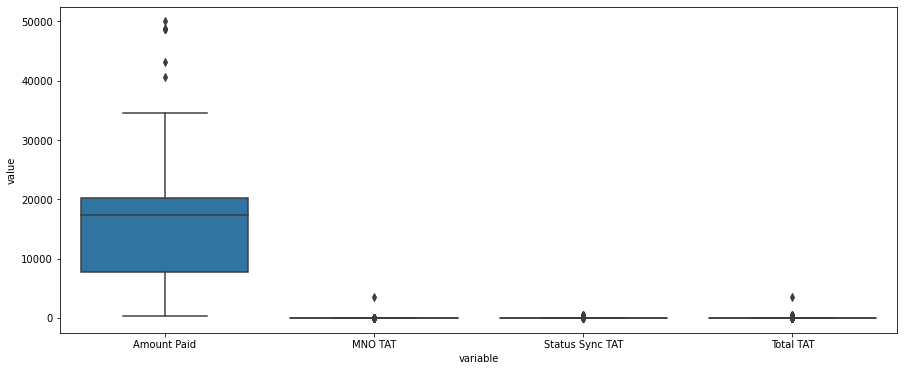

In [46]:

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df_plot = pd.DataFrame(data = numerical_variables_df, columns = numerical_variables_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df_plot))

plt.show()

#### Exploratory Data Analysis

In [47]:
df.head(2)

,Service Name,Client Name,Beep Transaction ID,Customer Mobile Number,Amount Paid,Date Created,Status Synced,Manually Reconciled,Final Status,MNO TAT,Status Sync TAT,Total TAT
0,Bolt Collections,TIGO TZ,25916854,891904920,17247,2022-04-21 00:03:47,NO,NO,SUCCESS,1.0,NaN,2.0
1,Bolt Collections,TIGO TZ,25916856,672727054,20697,2022-04-21 00:14:07,NO,NO,SUCCESS,1.0,NaN,2.0


In [48]:
df.columns

Index(['Service Name', 'Client Name', 'Beep Transaction ID',
       'Customer Mobile Number', 'Amount Paid', 'Date Created',
       'Status Synced', 'Manually Reconciled', 'Final Status', 'MNO TAT',
       'Status Sync TAT', 'Total TAT'],
      dtype='object')

In [49]:
df['Status Synced'].value_counts(normalize = False)

NO     1498
YES     153
Name: Status Synced, dtype: int64

Text(0.5, 1.0, 'countplot of Synced Status ')

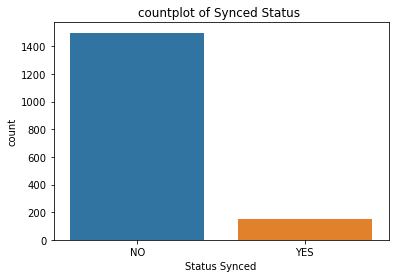

In [50]:
# plotting
sns.countplot(x = df['Status Synced'])
plt.title('countplot of Synced Status ')

In [51]:
df['Manually Reconciled'].value_counts(normalize = True)

NO    1.0
Name: Manually Reconciled, dtype: float64

In [52]:
df['Final Status'].value_counts(normalize = True)

SUCCESS    0.995154
PENDING    0.003634
FAILED     0.001211
Name: Final Status, dtype: float64

Text(0.5, 1.0, 'countplot of Final status Status ')

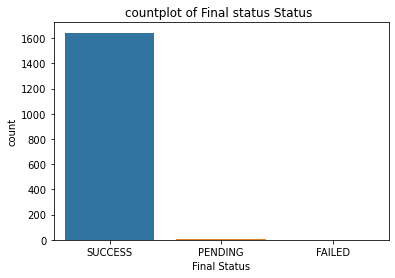

In [53]:
# plotting
sns.countplot(x = df['Final Status'])
plt.title('countplot of Final status Status ')

In [54]:
# Number of services
df['Service Name'].nunique()

8

In [55]:
# Services count
df['Service Name'].value_counts(normalize = False)

Bolt Collections          1492
Tigo Pesa B2C               32
Airtel Topup                31
Mpesa B2C                   24
ZANTELAIRTIMETZ             21
HalotelAirtime              21
AIRTEL B2C                  19
Selcom Airtime Service      11
Name: Service Name, dtype: int64

Text(0.5, 1.0, 'countplot of service name')

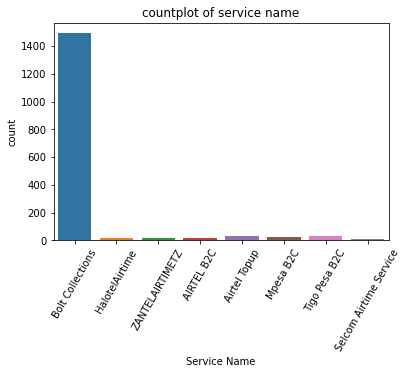

In [56]:
# plotting
sns.countplot(x = df['Service Name'])
plt.xticks(rotation = 60)
plt.title('countplot of service name')

In [57]:
# Number of clients
df['Client Name'].nunique()

7

In [58]:
# client count
df_client_name = df['Client Name'].value_counts(normalize = False)
df_client_name

TIGO TZ                703
Airtel Tanzania        462
VodacomMula            327
Bolt (Taxify)           73
TRANSFER TO LIMITED     72
Tranglo                 12
Dusupay                  2
Name: Client Name, dtype: int64

Text(0.5, 1.0, 'countplot of client name')

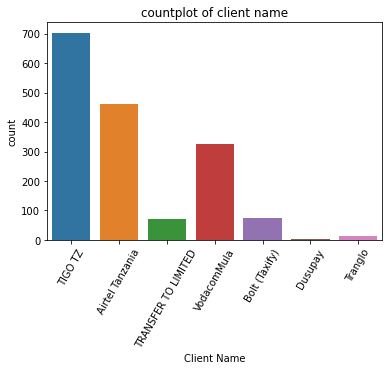

In [59]:
# Plotting
sns.countplot(x = df['Client Name'])
plt.xticks(rotation = 60)
plt.title('countplot of client name')

### Analysis by service name

In [60]:
df = df.drop(columns = ["Beep Transaction ID","Customer Mobile Number"])

In [61]:
services = df['Service Name'].unique().tolist()

In [62]:
type(services)

list

In [63]:
def perform_service_analysis():
    for service in services:
        df_service = df.loc[df['Service Name']== service]
        print("---------------------------------------------------------")
        print(service)
        desc_stats = df_service.describe()
        print("Descriptive Statistics\n", desc_stats)
        print("-------------------------------------------------------")
        status_synced = df_service['Status Synced'].value_counts(normalize = False)
        print("Status Synced", status_synced)
        final_status = df_service['Final Status'].value_counts(normalize = False)
        print("Final Status: \n", final_status)
        manually_rec = df_service['Manually Reconciled'].value_counts(normalize = False)
        print("Manually Reconciled \n",manually_rec)
        num_services = df_service['Service Name'].value_counts()
        print("Total Services\n", num_services)
    

In [64]:
perform_service_analysis()

---------------------------------------------------------
Bolt Collections
Descriptive Statistics
         Amount Paid      MNO TAT  Status Sync TAT    Total TAT
count   1492.000000  1492.000000        63.000000  1492.000000
mean   14794.270777     3.766756        78.698413     7.643432
std     6581.220002    93.016484       147.236329    98.934858
min      256.000000     1.000000         1.000000     1.000000
25%     9273.500000     1.000000         1.000000     2.000000
50%    17846.500000     1.000000         1.000000     2.000000
75%    20168.000000     2.000000        46.000000     2.000000
max    26445.000000  3594.000000       531.000000  3595.000000
-------------------------------------------------------
Status Synced NO    1492
Name: Status Synced, dtype: int64
Final Status: 
 SUCCESS    1491
FAILED        1
Name: Final Status, dtype: int64
Manually Reconciled 
 NO    1492
Name: Manually Reconciled, dtype: int64
Total Services
 Bolt Collections    1492
Name: Service Name, dtyp

#### Analysis by client name

In [65]:
clients = df['Client Name'].unique().tolist()
clients


['TIGO TZ',
 'Airtel Tanzania',
 'TRANSFER TO LIMITED',
 'VodacomMula',
 'Bolt (Taxify)',
 'Dusupay',
 'Tranglo']

In [66]:
type(clients)

list

In [67]:
def perfrom_client_analysis():
    for client in clients:
        df_client = df.loc[df['Client Name']== client]
        print("---------------------------------------------------------")
        print(client)
        desc_stats = df_client.describe()
        print("Descriptive Statistics\n", desc_stats)
        print("-------------------------------------------------------")
        status_synced = df_client['Status Synced'].value_counts(normalize = False)
        print("Status Synced", status_synced)
        final_status = df_client['Final Status'].value_counts(normalize = False)
        print("Final Status: \n", final_status)
        manually_rec = df_client['Manually Reconciled'].value_counts(normalize = False)
        print("Manually Reconciled \n",manually_rec)
        num_clients = df_client['Client Name'].value_counts()
        print("Total Clients\n", num_clients)
    

In [68]:
perfrom_client_analysis()

---------------------------------------------------------
TIGO TZ
Descriptive Statistics
         Amount Paid      MNO TAT  Status Sync TAT    Total TAT
count    703.000000   703.000000        39.000000   703.000000
mean   15383.140825     6.469417        68.820513    10.998578
std     6395.042157   135.504256       129.544114   139.573307
min     1050.000000     1.000000         1.000000     1.000000
25%    10384.000000     1.000000         1.000000     2.000000
50%    18429.000000     1.000000         1.000000     2.000000
75%    20253.000000     2.000000        72.500000     2.000000
max    26445.000000  3594.000000       531.000000  3595.000000
-------------------------------------------------------
Status Synced NO    703
Name: Status Synced, dtype: int64
Final Status: 
 SUCCESS    702
FAILED       1
Name: Final Status, dtype: int64
Manually Reconciled 
 NO    703
Name: Manually Reconciled, dtype: int64
Total Clients
 TIGO TZ    703
Name: Client Name, dtype: int64
----------------